In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
train_size = 0.67
random_state = 42 # any positive integer is acceptable, it is necessary for **reproducibility

In [68]:
df = pd.read_csv('/content/iris (1).csv' , sep=',' , header=None , names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [69]:
df.head(4)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [129]:
print("The total numbe rof missing rows are" , df.isnull().sum())
df.dtypes


The total numbe rof missing rows are sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


,0
sepal length,float64
sepal width,float64
petal length,float64
petal width,float64
class,object


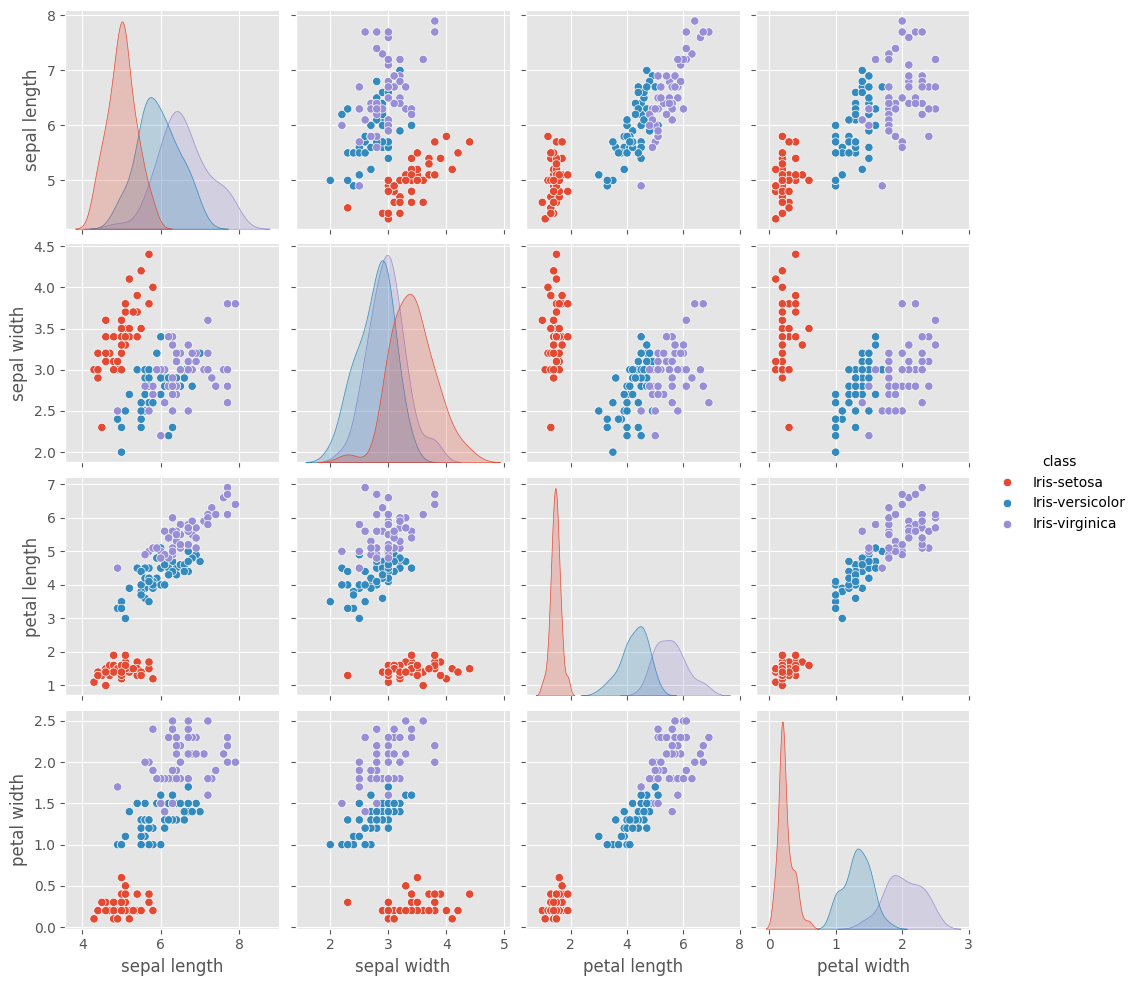

In [70]:
sns.pairplot(df, hue='class')

In [79]:
#prepare feature and target
X = df.drop('class' , axis =1)
y = df['class']

In [80]:
X.head()
X.shape

(150, 4)

In [115]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size= train_size, random_state=random_state)
print("After splitting the  value of training set is {} and testing set is {}".format(X_train.shape[0] ,X_test.shape[0] ))

After splitting the  value of training set is 100 and testing set is 50


In [90]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train , y_train)
y_train_dt = clf.predict(X_train)

In [101]:
from sklearn.metrics import accuracy_score
acctrain = accuracy_score(y_train, y_train_dt)
print("The accuracy score is {}%".format((acctrain )*100))

The accuracy score is 100.0%


In [103]:
y_test_pred = clf.predict(X_test)
acctest = accuracy_score(y_test, y_test_pred)
print("The accuracy score is {}%".format((acctest )*100))

The accuracy score is 98.0%


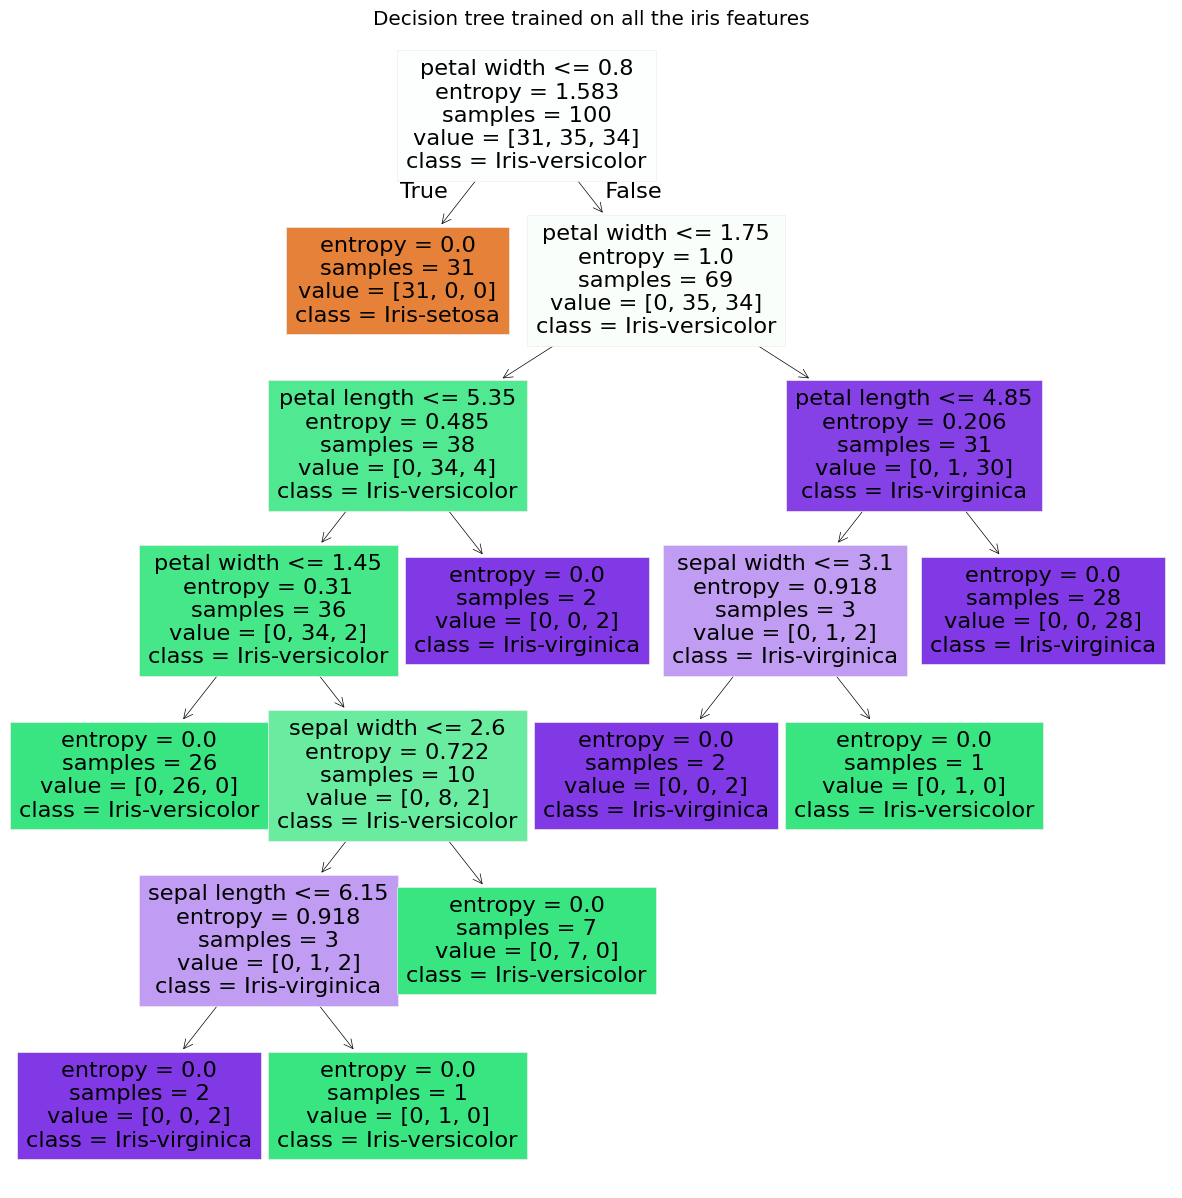

In [124]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
plt.figure(figsize = (15,15))
plot_tree(clf, filled=True , feature_names = X.columns ,  class_names= clf.classes_ )
plt.title("Decision tree trained on all the iris features")
plt.show()